# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:
1. Importing Libraries
2. Importing Data 
3. Checking Data
4. Data Security Measures
5. Regional Segmentation
6. Exclusion Flag for Low-Activity Customers
7. Customer Profiling
8. Visualization of Customer Profiles
9. Aggregation of the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
10. Comparision of Customers Profiles by Regions and Departments 
11. Additional Visualizations

# 01. Importing Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [3]:
# Project folder path
path=r'C:\Users\maryn\Documents\Data Projects\Instacart Basket Analysis'

In [4]:
# Import dataset order_products_all.pkl
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_all.pkl'))

# 03. Checking Data

In [5]:
# Display the information order_products_all.pkl
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,surname,gender,state,age,number_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [6]:
ords_prods_all.shape

(32404859, 32)

In [7]:
ords_prods_all.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
ordering_behavior          float64
order_freq_flag             object
first_name                  object
surname                     object
gender                      object
state                       object
age                          int64
number_dependants   

# 04. Data Security Measures

In [8]:
# Drop the columns 'first_name' and 'surname' as they contain personally identifiable information (PII)
ords_prods_all = ords_prods_all.drop(columns =['first_name', 'surname'])

In [9]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'spending_flag', 'ordering_behavior', 'order_freq_flag',
       'gender', 'state', 'age', 'number_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')

# 05. Regional Segmentation

In [10]:
# Create the list of regions
result = []

for state in ords_prods_all['state']:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    else:
        result.append('West')

In [11]:
# Create region column 
ords_prods_all['region'] = result

In [12]:
# Chaeck the unique values in the 'region' column
ords_prods_all['region'].value_counts(dropna= False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [13]:
# Check the difference in spending habits between regions 
crosstab = pd.crosstab(ords_prods_all['spending_flag'], ords_prods_all['region'], dropna = False)

In [14]:
crosstab.to_clipboard()

In [15]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


# 06. Exclusion Flag for Low-Activity Customers

In [16]:
# Create low activity flag
ords_prods_all.loc[(ords_prods_all['max_order'] < 5), 'activity_flag'] = 'Low Activity'

In [17]:
# Create regular activity flag
ords_prods_all.loc[(ords_prods_all['max_order'] >= 5), 'activity_flag'] = 'Regular Activity'

In [18]:
# Check the values
ords_prods_all['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    30964564
Low Activity         1440295
Name: count, dtype: int64

In [19]:
# Create dataframe excluding low activity customers
ords_prods_all_excl = ords_prods_all[ords_prods_all["activity_flag"].isin(["Regular Activity"])]

In [20]:
# Check the values
ords_prods_all_excl['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    30964564
Name: count, dtype: int64

In [21]:
# Exporting ords_prods_all_excl in pickle format
ords_prods_all_excl.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all_excl.pkl'))

# 07. Customer Profiling

In [22]:
# Check descriptive statistics for profiling variables
ords_prods_all_excl[['age', 'income', 'department_id', 'number_dependants']].describe().astype(int)

,age,income,department_id,number_dependants
count,30964564,30964564,30964564,30964564
mean,49,99675,9,1
std,18,43141,6,1
min,18,25903,1,0
25%,33,67292,4,1
50%,49,96765,9,2
75%,65,128102,16,3
max,81,593901,21,3


### Age Group Flag

In [23]:
# Create young adult flag
ords_prods_all_excl.loc[ords_prods_all_excl['age'].between(18,39), 'age_group'] = 'Young Adult'

C:\Users\maryn\AppData\Local\Temp\ipykernel_8388\1193105476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_excl.loc[ords_prods_all_excl['age'].between(18,39), 'age_group'] = 'Young Adult'


In [24]:
# Create middle-aged adult flag
ords_prods_all_excl.loc[ords_prods_all_excl['age'].between(40,64), 'age_group'] = 'Middle Aged Adult'

In [25]:
# Create senior citizen flag
ords_prods_all_excl.loc[ords_prods_all_excl['age'] >= 65, 'age_group'] = 'Senior Citizen'

In [26]:
# Check the values
ords_prods_all_excl['age_group'].value_counts(dropna = False)

age_group
Middle Aged Adult    12103910
Young Adult          10665110
Senior Citizen        8195544
Name: count, dtype: int64

### Income Flag

In [27]:
# Create low income flag
ords_prods_all_excl.loc[ords_prods_all_excl['income'] < 80000, 'income_flag'] = 'Low Income'

C:\Users\maryn\AppData\Local\Temp\ipykernel_8388\3508588220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_excl.loc[ords_prods_all_excl['income'] < 80000, 'income_flag'] = 'Low Income'


In [28]:
# Create middle income flag
ords_prods_all_excl.loc[(ords_prods_all_excl['income'] >= 80000) & (ords_prods_all_excl['income'] < 150000), 'income_flag'] = 'Middle Income'

In [29]:
# Create high income flag
ords_prods_all_excl.loc[ords_prods_all_excl['income'] >= 150000, 'income_flag'] = 'High Income'

In [30]:
# Check the values
ords_prods_all_excl['income_flag'].value_counts(dropna = False)

income_flag
Middle Income    16077641
Low Income       10991648
High Income       3895275
Name: count, dtype: int64

### Parent Flag

In [31]:
# Create parent flag
result = []

for value in ords_prods_all_excl['number_dependants']:
    if value == 0:
        result.append('Not Parent')
    else:
        result.append('Parent')

In [32]:
# Create a parent_flag column
ords_prods_all_excl['parent_flag'] = result

C:\Users\maryn\AppData\Local\Temp\ipykernel_8388\3415874734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_excl['parent_flag'] = result


In [33]:
# Check the values
ords_prods_all_excl['parent_flag'].value_counts(dropna = False)

parent_flag
Parent        23224883
Not Parent     7739681
Name: count, dtype: int64

In [34]:
# Define lists of unique values for each profiling variable
age_profiles = ['Young Adult', 'Middle Age Adult', 'Senior Citizen']
parenting_profiles = ['Not Parent', 'Parent']

In [35]:
# Generate all possible combinations of customer profiles
customer_profiles = []
for age_profile in age_profiles:
    for parenting_profile in parenting_profiles:
        customer_profiles.append((age_profile, parenting_profile))

In [36]:
# Display the list of customer profiles
customer_profiles

[('Young Adult', 'Not Parent'),
 ('Young Adult', 'Parent'),
 ('Middle Age Adult', 'Not Parent'),
 ('Middle Age Adult', 'Parent'),
 ('Senior Citizen', 'Not Parent'),
 ('Senior Citizen', 'Parent')]

### Customer Profile Flag

In [37]:
# create single young adult flag
ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Young Adult')
                      & (ords_prods_all_excl['parent_flag'] == 'Not Parent'),
                     'customer_profile'] = 'Single Young Adult'

C:\Users\maryn\AppData\Local\Temp\ipykernel_8388\3640520383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Young Adult')


In [38]:
# create young parent flag
ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Young Adult')
                      & (ords_prods_all_excl['parent_flag'] == 'Parent'),
                       'customer_profile'] = 'Young Parent'

In [39]:
# create single middle aged adult flag
ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Middle Aged Adult')
                      & (ords_prods_all_excl['parent_flag'] == 'Not Parent'),
                       'customer_profile'] = 'Single Middle Aged Adult'

In [40]:
# create middle aged parent flag
ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Middle Aged Adult')
                      & (ords_prods_all_excl['parent_flag'] == 'Parent'),
                       'customer_profile'] = 'Middle Aged Parent'

In [41]:
# create single senior citizen flag
ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Senior Citizen')
                      & (ords_prods_all_excl['parent_flag'] == 'Not Parent'),
                       'customer_profile'] = 'Single Senior Citizen'

In [42]:
# create senior parent with flag
ords_prods_all_excl.loc[(ords_prods_all_excl['age_group'] == 'Senior Citizen')
                      & (ords_prods_all_excl['parent_flag'] == 'Parent'),
                       'customer_profile'] = 'Senior Parent'

In [43]:
# Check the values
ords_prods_all_excl['customer_profile'].value_counts(dropna = False)

customer_profile
Middle Aged Parent          9046762
Young Parent                8004535
Senior Parent               6173586
Single Middle Aged Adult    3057148
Single Young Adult          2660575
Single Senior Citizen       2021958
Name: count, dtype: int64

In [44]:
df_customer_profile = ords_prods_all_excl['customer_profile'].value_counts(dropna = False)

In [45]:
df_customer_profile.to_clipboard()

In [46]:
# Group customer_profile and income_flag
ords_prods_all_excl.groupby('customer_profile')['income_flag'].value_counts(dropna = False)

customer_profile          income_flag  
Middle Aged Parent        Middle Income    5646980
                          Low Income       1729292
                          High Income      1670490
Senior Parent             Middle Income    3967276
                          High Income      1149333
                          Low Income       1056977
Single Middle Aged Adult  Middle Income    1902116
                          High Income       578225
                          Low Income        576807
Single Senior Citizen     Middle Income    1293678
                          High Income       395159
                          Low Income        333121
Single Young Adult        Low Income       1828306
                          Middle Income     808646
                          High Income        23623
Young Parent              Low Income       5467145
                          Middle Income    2458945
                          High Income        78445
Name: count, dtype: int64

In [51]:
# Group department_id and customer_profile
ords_prods_all_excl.groupby('department_id')['customer_profile'].value_counts(dropna = False)

department_id  customer_profile        
1              Middle Aged Parent          620619
               Young Parent                548618
               Senior Parent               423146
               Single Middle Aged Adult    210059
               Single Young Adult          178185
                                            ...  
21             Young Parent                 16731
               Senior Parent                12932
               Single Middle Aged Adult      6184
               Single Young Adult            5768
               Single Senior Citizen         3983
Name: count, Length: 126, dtype: int64

In [52]:
# Group orders_day_of_week and customer_profile
ords_prods_all_excl.groupby('orders_day_of_week')['customer_profile'].value_counts(dropna = False)

orders_day_of_week  customer_profile        
0                   Middle Aged Parent          1713964
                    Young Parent                1537263
                    Senior Parent               1180305
                    Single Middle Aged Adult     587045
                    Single Young Adult           504094
                    Single Senior Citizen        385939
1                   Middle Aged Parent          1579693
                    Young Parent                1400497
                    Senior Parent               1069146
                    Single Middle Aged Adult     532745
                    Single Young Adult           481256
                    Single Senior Citizen        348349
2                   Middle Aged Parent          1186110
                    Young Parent                1033069
                    Senior Parent                802946
                    Single Middle Aged Adult     397014
                    Single Young Adult           343343
   

In [53]:
# Group order_hour_of_day and customer_profile
ords_prods_all_excl.groupby('order_hour_of_day')['customer_profile'].value_counts(dropna = False)

order_hour_of_day  customer_profile        
0                  Middle Aged Parent          60207
                   Young Parent                55383
                   Senior Parent               41018
                   Single Middle Aged Adult    20813
                   Single Young Adult          18244
                                               ...  
23                 Young Parent                97643
                   Senior Parent               77105
                   Single Middle Aged Adult    41048
                   Single Young Adult          32808
                   Single Senior Citizen       24965
Name: count, Length: 144, dtype: int64

# 08. Visualization of Customer Profiles

Text(0, 0.5, 'customer_profile')

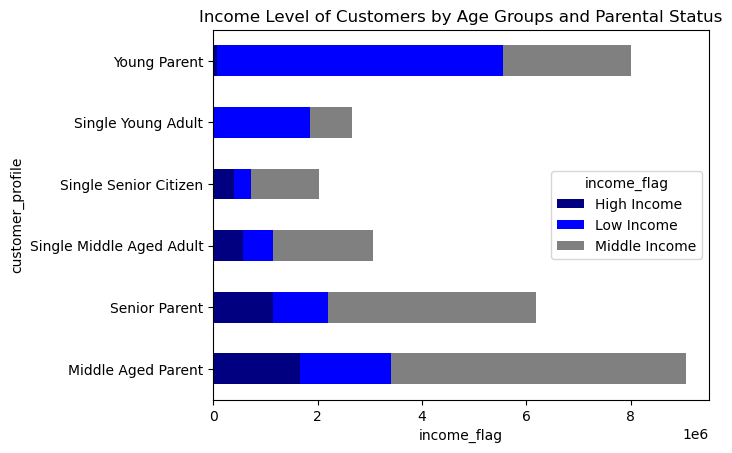

In [79]:
# Create stacked bar chart for customer_profile and income_flag
customer_income = ords_prods_all_excl.groupby(['customer_profile','income_flag']).size().unstack()

bar_1 = customer_income.plot.barh (stacked = True, color = ['navy','blue','grey'])
 
# Add Title and Labels
plt.title('Income Level of Customers by Age Groups and Parental Status')
plt.xlabel('income_flag')
plt.ylabel('customer_profile')

In [76]:
# Export customer_profile and income chart
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_income.png'))

Text(0, 0.5, 'department_id')

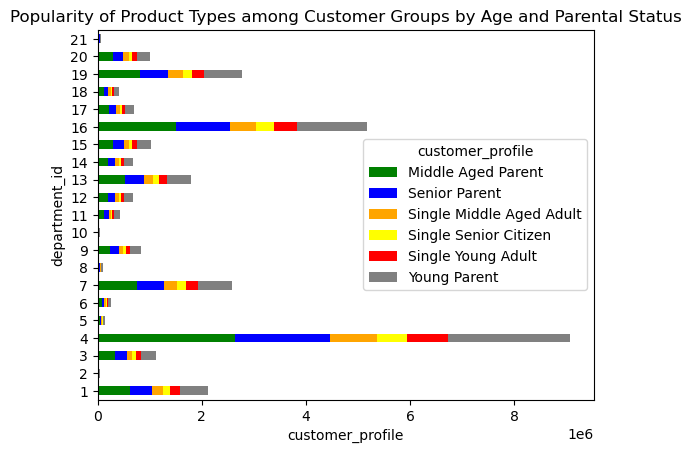

In [89]:
# Create stacked bar chart for department_id and customer_profile
dep_cust = ords_prods_all_excl.groupby(['department_id','customer_profile']).size().unstack()

bar_2 = dep_cust.plot.barh (stacked = True, color = ['green','blue','orange','yellow','red', 'grey'])
 
# Add Title and Labels
plt.title('Popularity of Product Types among Customer Groups by Age and Parental Status')
plt.xlabel('customer_profile')
plt.ylabel('department_id')

In [90]:
# Export department_id and customer_profile chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_department.png'))

Text(0.5, 23.52222222222222, 'department_id')

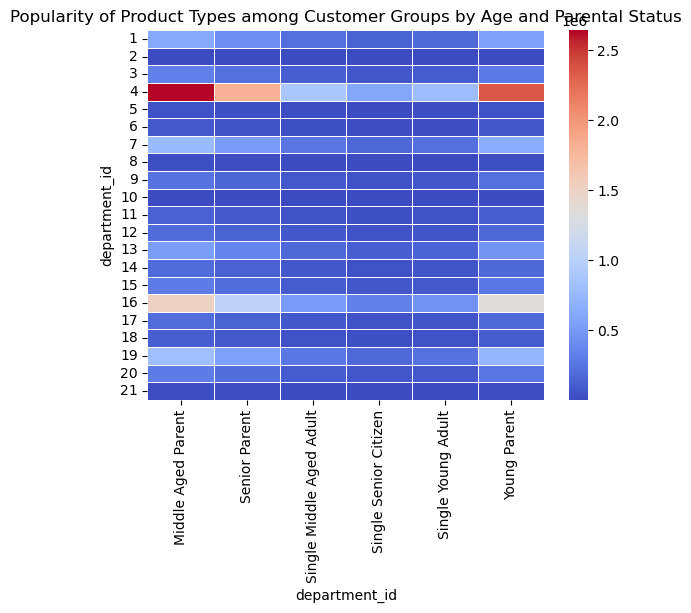

In [98]:
# Create heatmap for customer_profile and department_id
dep_cust_heat = plt.figure()
plt.title('Popularity of Product Types among Customer Groups by Age and Parental Status')
sns.heatmap(dep_cust, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('department_id')

In [99]:
# Export department_id and customer_profile heatmap
dep_cust_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_customer_department.png'))

Text(0, 0.5, 'customer_profile')

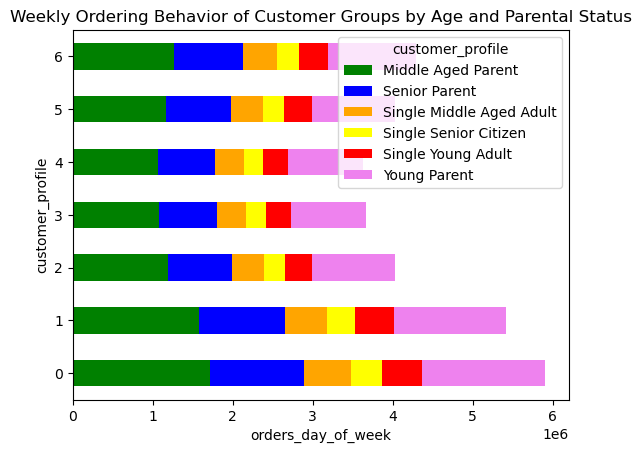

In [93]:
# Create stacked bar chart for orders_day_of_week and customer_profile
cust_ord_dow = ords_prods_all_excl.groupby(['orders_day_of_week','customer_profile']).size().unstack()

bar_3 = cust_ord_dow.plot.barh (stacked = True, color = ['green','blue','orange','yellow','red', 'violet', 'grey'])
 
# Add Title and Labels
plt.title('Weekly Ordering Behavior of Customer Groups by Age and Parental Status')
plt.xlabel('orders_day_of_week')
plt.ylabel('customer_profile')

In [94]:
# Export orders_day_of_week and customer_profile chart
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customres_orders_dow.png'))

Text(0, 0.5, 'customer_profile')

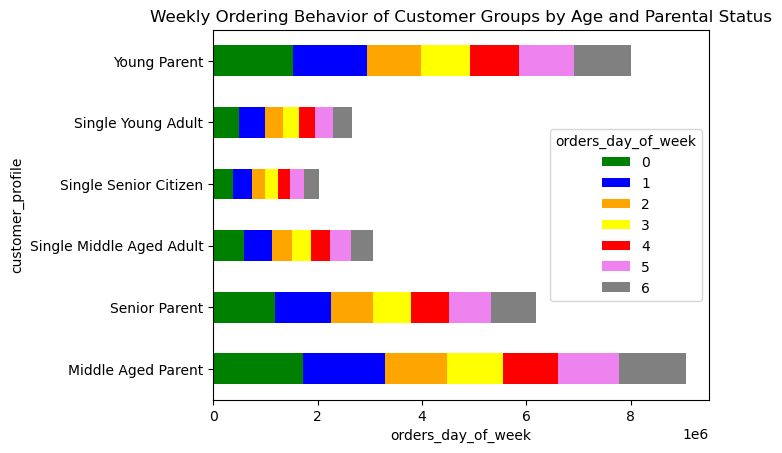

In [96]:
# Create stacked bar chart for orders_day_of_week and customer_profile
cust_ord_dow_1 = ords_prods_all_excl.groupby(['customer_profile','orders_day_of_week']).size().unstack()

bar_4 = cust_ord_dow_1.plot.barh (stacked = True, color = ['green','blue','orange','yellow','red', 'violet', 'grey'])
 
# Add Title and Labels
plt.title('Weekly Ordering Behavior of Customer Groups by Age and Parental Status')
plt.xlabel('orders_day_of_week')
plt.ylabel('customer_profile')

In [97]:
# Export orders_day_of_week and customer_profile chart
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customres_orders_dow_2.png'))

Text(0, 0.5, 'customer_profile')

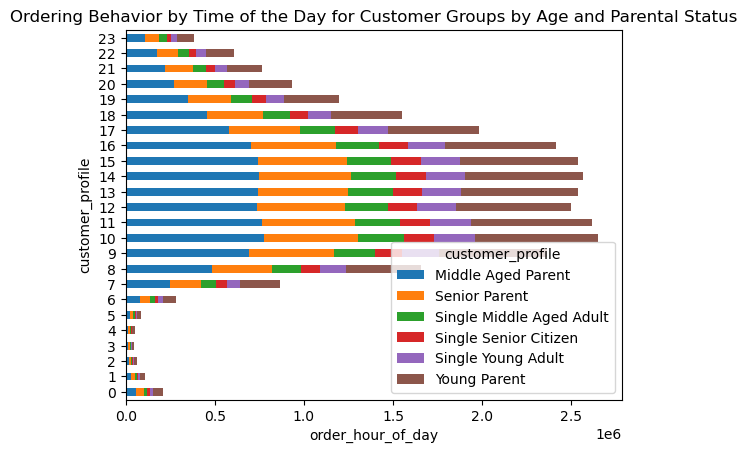

In [100]:
# Create stacked bar chart for order_hour_of_day and customer_profile
cust_ord_hod = ords_prods_all_excl.groupby(['order_hour_of_day','customer_profile']).size().unstack()

bar_5 = cust_ord_hod.plot.barh (stacked = True)
 
# Add Title and Labels
plt.title('Ordering Behavior by Time of the Day for Customer Groups by Age and Parental Status')
plt.xlabel('order_hour_of_day')
plt.ylabel('customer_profile')

In [101]:
# Export order_hour_of_day and customer_profile chart
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customres_orders_hod.png'))

Text(50.722222222222214, 0.5, 'order_hour_of_day')

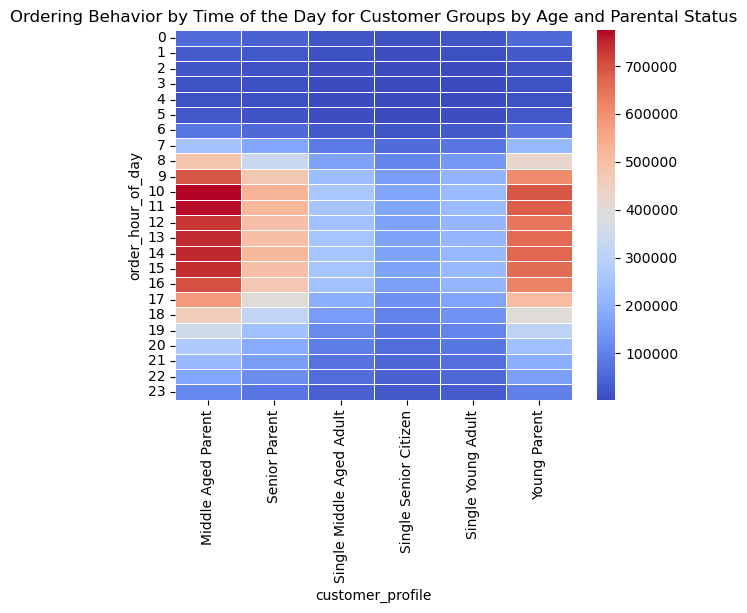

In [124]:
# Create heatmap for order_hour_of_day and customer_profile
cust_ord_hod_heat = plt.figure()
plt.title('Ordering Behavior by Time of the Day for Customer Groups by Age and Parental Status')
sns.heatmap(cust_ord_hod, cmap = 'coolwarm', linewidth=.5)
plt.ylabel('order_hour_of_day')

In [103]:
# Export heatmap for order_hour_of_day and customer_profile
cust_ord_hod_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_customer_orders_hours.png'))

# 09. Aggregation of the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [118]:
# Aggregate customer_profile and max_order
ords_prods_all_excl.groupby('customer_profile').agg({'max_order': ['mean','min','max']})

max_order        
                               mean min max
customer_profile                           
Middle Aged Parent        34.179667   5  99
Senior Parent             34.288679   5  99
Single Middle Aged Adult  35.146803   5  99
Single Senior Citizen     34.442822   5  99
Single Young Adult        34.311760   5  99
Young Parent              34.567537   5  99

In [119]:
# Aggregate customer_profile and spending
ords_prods_all_excl.groupby('customer_profile').agg({'spending': ['mean','min','max']})

spending                        
                               mean       min           max
customer_profile                                           
Middle Aged Parent        11.815053  1.500000   6983.593023
Senior Parent             11.675617  1.262500   7414.485185
Single Middle Aged Adult  12.329140  1.000000  15006.940000
Single Senior Citizen     12.008598  1.308333  14042.512281
Single Young Adult        11.913898  1.800000   8794.882427
Young Parent              12.102786  1.000000  10209.987755

# 10. Comparision of Customers Profiles by Regions and Departments

Text(0, 0.5, 'customer_profile')

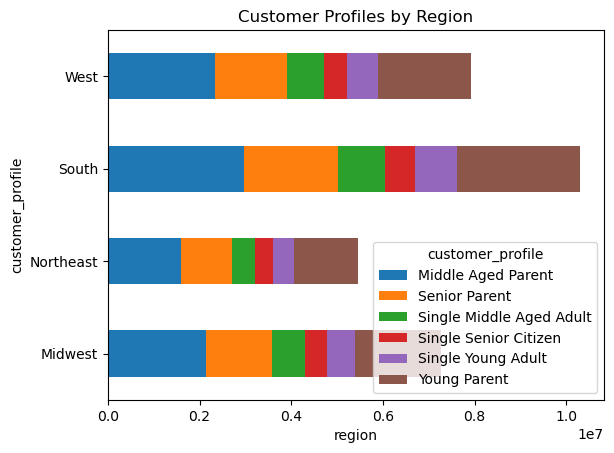

In [121]:
# Create stacked bar chart for region and customer_profile
cust_region = ords_prods_all_excl.groupby(['region','customer_profile']).size().unstack()

bar_6 = cust_region.plot.barh (stacked = True)

# Add Title and Labels
plt.title('Customer Profiles by Region')
plt.xlabel('region')
plt.ylabel('customer_profile')

In [123]:
# Export order_hour_of_day and customer_profile chart
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_region.png'))

Text(0.5, 23.52222222222222, 'region')

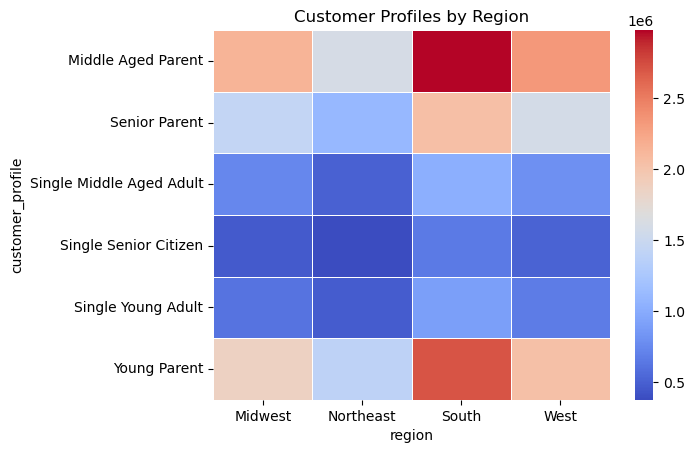

In [126]:
# Create heatmap for region and customer_profile
cust_region_1 = ords_prods_all_excl.groupby(['customer_profile','region']).size().unstack()
cust_region_heat = plt.figure()
plt.title('Customer Profiles by Region')
sns.heatmap(cust_region_1, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('region')

In [127]:
# Export region and customer_profile heatmap
cust_region_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_region_heat.png'))

# 11. Additional Visualizations

<Axes: title={'center': 'Popular Departments by Region'}, xlabel='department_id', ylabel='region'>

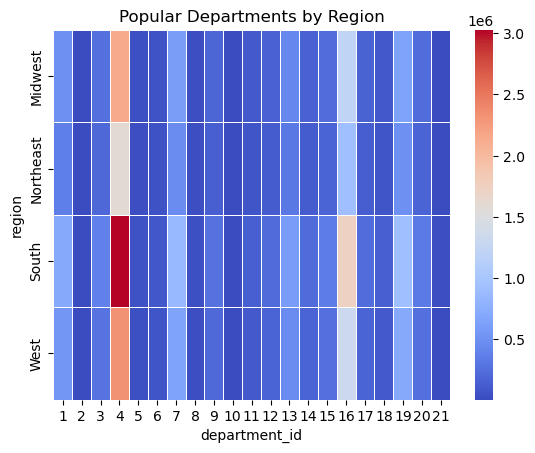

In [129]:
# Create heatmap for region and department_id
dep_region = ords_prods_all_excl.groupby(['region', 'department_id']).size().unstack()
dep_region_heat = plt.figure()
plt.title('Popular Departments by Region')
sns.heatmap(dep_region, cmap = 'coolwarm', linewidth=.5)

In [130]:
# Export region and department_id heatmap
dep_region_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_region_heat.png'))

<Axes: title={'center': 'Popular Departments by Day of Week'}, xlabel='department_id', ylabel='orders_day_of_week'>

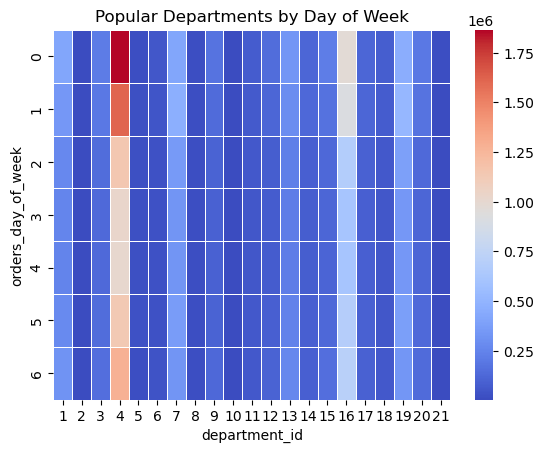

In [133]:
# Create heatmap for orders_day_of_week and department_id
dep_orders_dow = ords_prods_all_excl.groupby(['orders_day_of_week', 'department_id']).size().unstack()
dep_orders_dow_heat = plt.figure()
plt.title('Popular Departments by Day of Week')
sns.heatmap(dep_orders_dow, cmap = 'coolwarm', linewidth=.5)

In [135]:
# Export heatmap for orders_day_of_week and department_id
dep_orders_dow_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_orders_dow_heat.png'))

<Axes: title={'center': 'Popular Departments by Hour of Day'}, xlabel='department_id', ylabel='order_hour_of_day'>

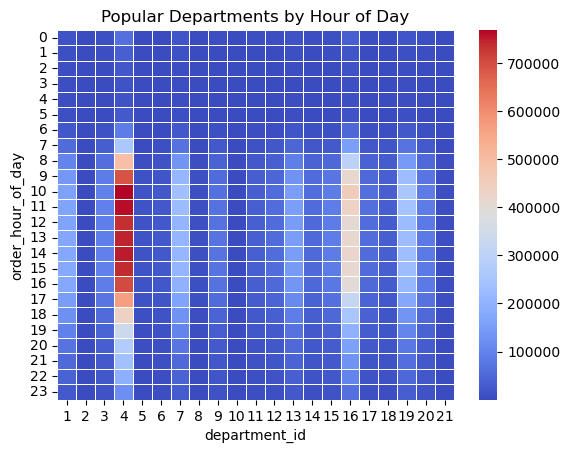

In [134]:
# Create heatmap for order_hour_of_day and department_id
dep_orders_hod = ords_prods_all_excl.groupby(['order_hour_of_day', 'department_id']).size().unstack()
dep_orders_hod_heat = plt.figure()
plt.title('Popular Departments by Hour of Day')
sns.heatmap(dep_orders_hod, cmap = 'coolwarm', linewidth=.5)

In [136]:
# Export heatmap for orders_day_of_week and department_id
dep_orders_hod_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_orders_hod_heat.png'))

<Axes: title={'center': 'Popular Departments by Spending Type'}, xlabel='department_id', ylabel='spending_flag'>

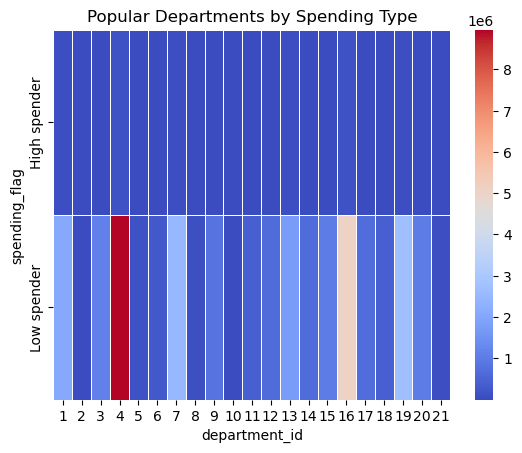

In [137]:
# Create heatmap for spending_flag and department_id
dep_spending = ords_prods_all_excl.groupby(['spending_flag', 'department_id']).size().unstack()
dep_spending_heat = plt.figure()
plt.title('Popular Departments by Spending Type')
sns.heatmap(dep_spending, cmap = 'coolwarm', linewidth=.5)

Text(0, 0.5, 'spending_flag')

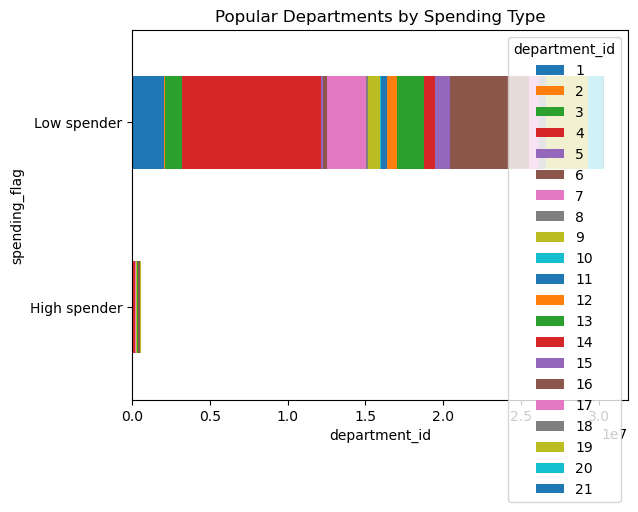

In [138]:
# Create stacked bar chart for spending_flag and department_id
bar_7 = dep_spending.plot.barh (stacked = True)
 
# Add Title and Labels
plt.title('Popular Departments by Spending Type')
plt.xlabel('department_id')
plt.ylabel('spending_flag')

Text(0.5, 0, 'department_id')

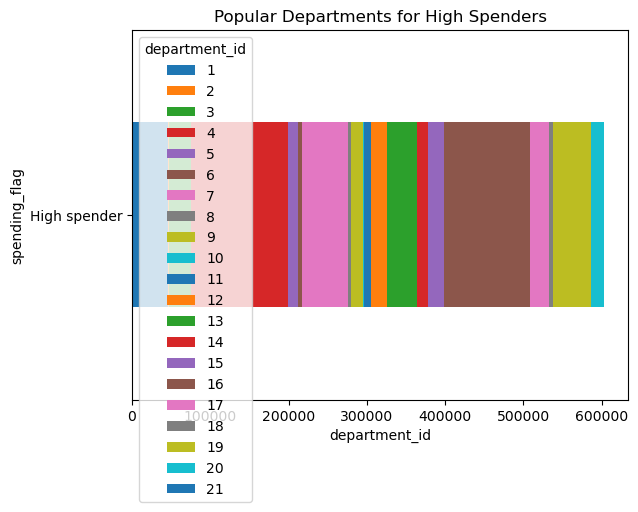

In [139]:
# Create stacked bar chart for spending_flag 'High spender' and department_id
ords_prods_high_spender = ords_prods_all_excl[ords_prods_all_excl['spending_flag'] == 'High spender']
dep_spending_1 = ords_prods_high_spender.groupby(['spending_flag', 'department_id']).size().unstack()

# Plot the stacked bar chart
bar_8 = dep_spending_1.plot.barh(stacked=True)

# Add Title and Labels
plt.title('Popular Departments for High Spenders')
plt.xlabel('department_id')


Text(0.5, 1.0, 'Age Groups')

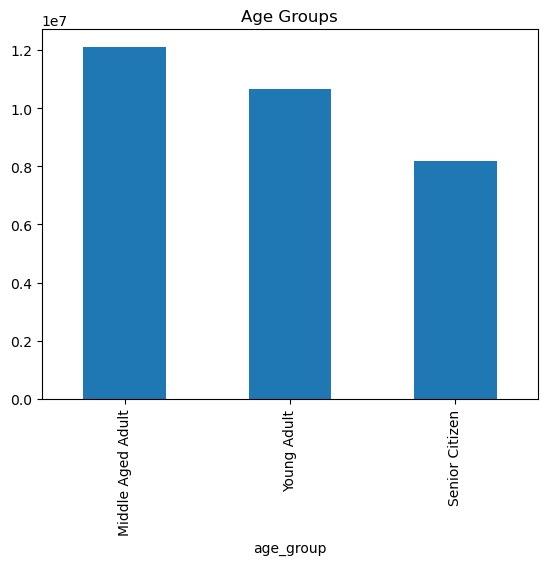

In [143]:
# Create bar chart for age_group
bar_9 = ords_prods_all_excl['age_group'].value_counts().plot.bar()

plt.title('Age Groups')

In [145]:
# Export bar chart for age_group
bar_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups.png'))

Text(0.5, 1.0, 'Marital_status')

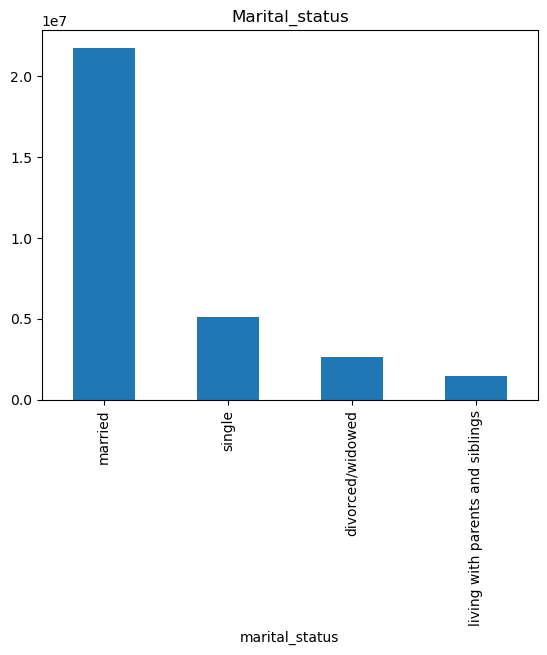

In [146]:
# Create bar chart for marital_status

bar_10 = ords_prods_all_excl['marital_status'].value_counts().plot.bar()

plt.title('Marital_status')

In [147]:
# Export bar chart for marital_status
bar_10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status.png'))

Text(0.5, 1.0, 'Number ofdependants')

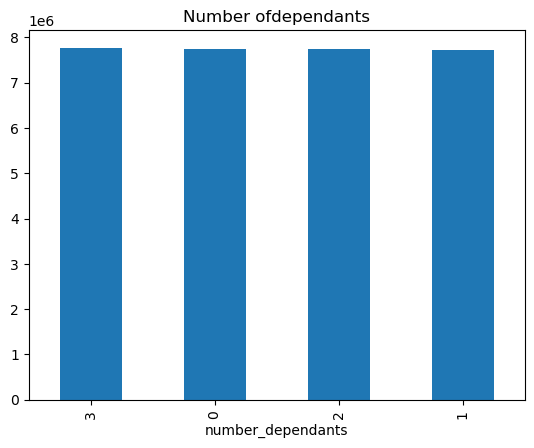

In [148]:
# Create bar chart for number_dependants

bar_11 = ords_prods_all_excl['number_dependants'].value_counts().plot.bar()

plt.title('Number ofdependants')